# Linear Regression

Linear Regression ek statistical technique hai jo dependent variable (output) aur ek ya zyada independent variables (features) ke beech ka linear relationship find karta hai. Yeh supervised machine learning ka ek common algorithm hai, jo mostly regression problems ke liye use hota hai.

Linear Regression ka goal hai ek straight line (regression line) find karna jo data ke points ke beech ka best fit ho. Iska formula hai:

    y = mx + c

## When to Use Linear Regression?

### When Relationship is Linear:

Use it jab dependent variable (y) aur independent variables (x) ka relationship linear ho.

Example: "As temperature increases, ice cream sales increase."

### When Dataset is Simple:

Jab dataset bohot complex na ho aur features limited ho.

### When You Want Interpretability:

Jab tumhe coefficients (features ka effect) ko samajhna ho. Example: How much a 1-unit increase in advertising budget increases sales.

### When NOT to Use Linear Regression?
* Non-Linear Relationships:

Jab dependent aur independent variables ka relationship non-linear ho.

* High Multicollinearity:

Jab features apas me highly correlated ho (e.g., two features with very similar information).

* Outliers:

Jab dataset me outliers ho, jo regression line ko distort karte hain.

* Non-Normal Residuals:

Jab errors (residuals) normally distributed na ho.

## Types of Linear Regression

1) Simple Linear Regression:

Single independent variable (e.g., Predicting sales based on advertising spend).
Multiple Linear Regression:

Multiple independent variables (e.g., Predicting house price based on area, bedrooms, and location).

2) Polynomial Regression:

Extend linear regression for non-linear data by adding polynomial terms.

3) Ridge Regression (L2 Regularization):

Penalizes large coefficients to reduce overfitting.

4) Lasso Regression (L1 Regularization):

Shrinks less important coefficients to zero, selecting only important features.

5) Elastic Net Regression:

Combines Ridge and Lasso regularization.

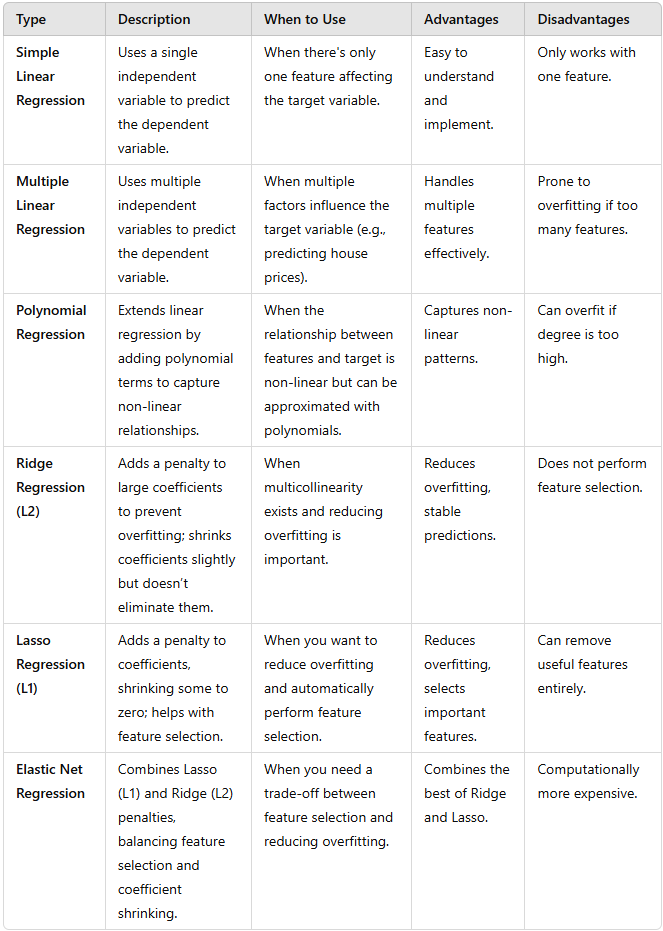


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='total_bill', ylabel='tip'>

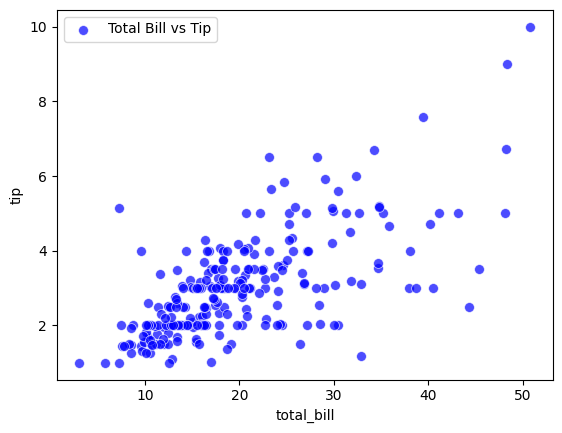

In [32]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], data=df, color='blue', marker='o', s=50, alpha=0.7, label='Total Bill vs Tip', )

In [33]:
X = df[['total_bill']]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
y = df['tip']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
print(model.intercept_)
print(model.coef_)
print('y = ' + str(model.intercept_) + ' + ' + str(model.coef_[0]) + ' * X')

1.084962131544761
[0.09571801]
y = 1.084962131544761 + 0.0957180055515496 * X


In [38]:
model.predict([[5]])

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.56355216])

In [39]:
y_pred = model.predict(X_test)

In [40]:
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('r2: ' + str(r2_score(y_test, y_pred)))

MSE: 1.0650439177341078
RMSE: 1.032009650019857
r2: 0.5757236165331405


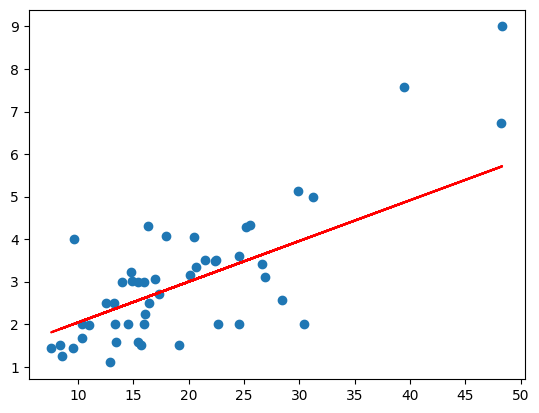

In [41]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')